In [1]:
import napari
import numpy as np
import matplotlib.pyplot as plt
import z5py
from pathlib import Path

In [2]:
def print_key_tree(f: z5py.File):
    print(f"Key structure of z5 file {f.filename}")
    f.visititems(lambda name, obj: print(name))


def read_volume(f: z5py.File, key: str, roi: np.lib.index_tricks.IndexExpression = np.s_[:]):
    try:
        ds = f[key]
    except KeyError:
        print(f"No key {key} in file {f.filename}")
        print_key_tree(f)
        return None
        
    ds.n_threads = 8
    print(f"Reading roi {roi} of volume {key} from {f.filename}")
    vol = ds[roi]
    print(f"Read volume with shape {vol.shape}, data type {vol.dtype}")
    
    return vol

## View n5 datasets

In [3]:
scratch_dir = Path("/scratch/buglakova/data/cryofib/registration_fluo/F107_A2_3dclem")
fluo_dir = scratch_dir / "fluo"
fluo_n5_path = fluo_dir / "fluo.n5"
f_fluo = z5py.File(fluo_n5_path, "r")

In [4]:
output_dir = Path("/scratch/buglakova/data/cryofib/segm_fluo/cellpose")
output_n5_path = output_dir / "cellpose_2D.n5"
f_out = z5py.File(output_n5_path, "r")

## Read volumes

In [5]:
roi = np.s_[:]
raw = read_volume(f_fluo, "raw", roi)

Reading roi slice(None, None, None) of volume raw from /scratch/buglakova/data/cryofib/registration_fluo/F107_A2_3dclem/fluo/fluo.n5
Read volume with shape (55, 3343, 1482), data type uint8


In [6]:
raw.shape

(55, 3343, 1482)

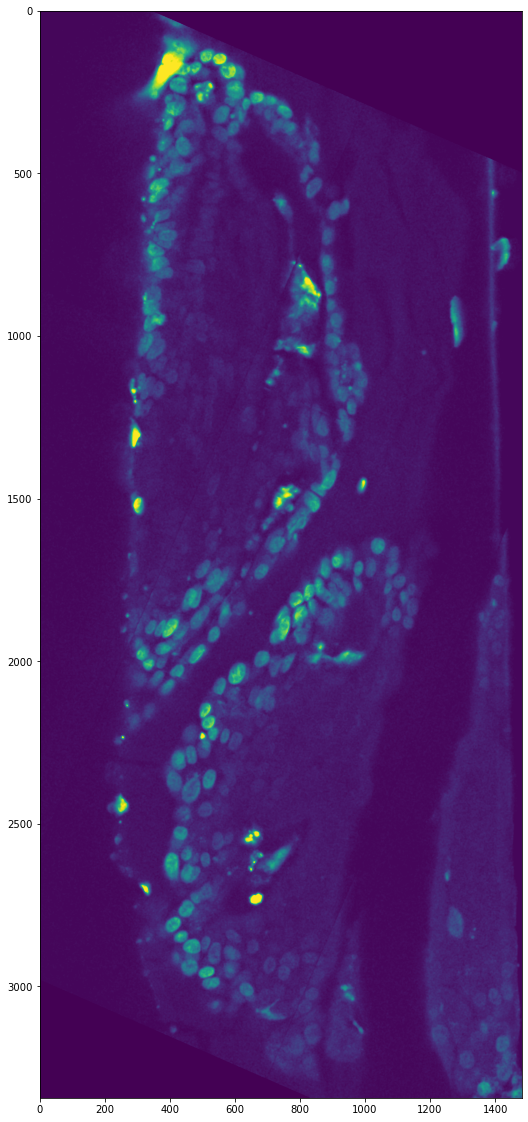

In [9]:
plt.figure(figsize=(10, 20))
plt.imshow(raw[20, :, :])

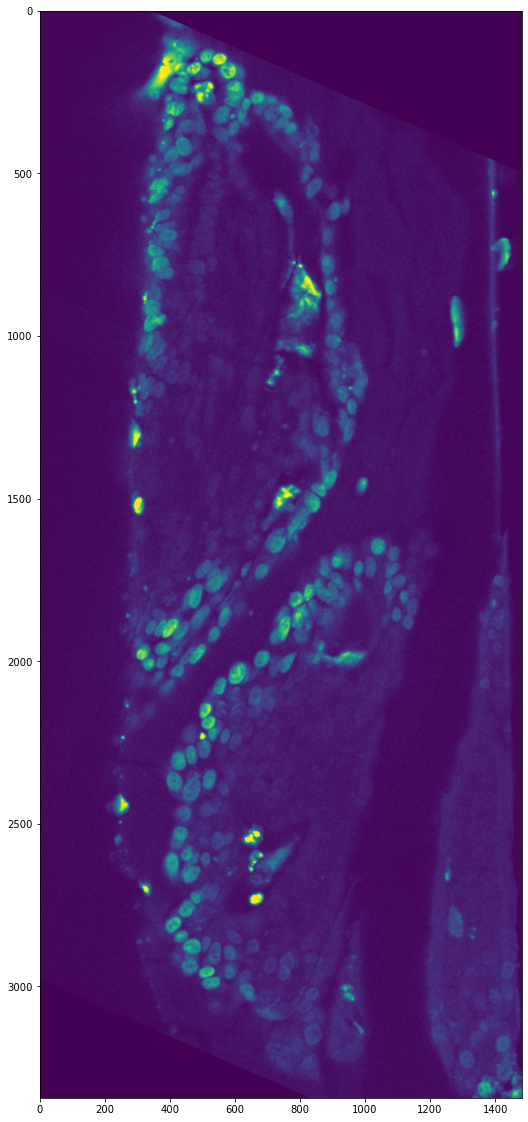

In [10]:
plt.figure(figsize=(10, 20))
plt.imshow(raw[19, :, :])

In [11]:
img = raw[19, :, :]

In [12]:
import skimage.filters as filters

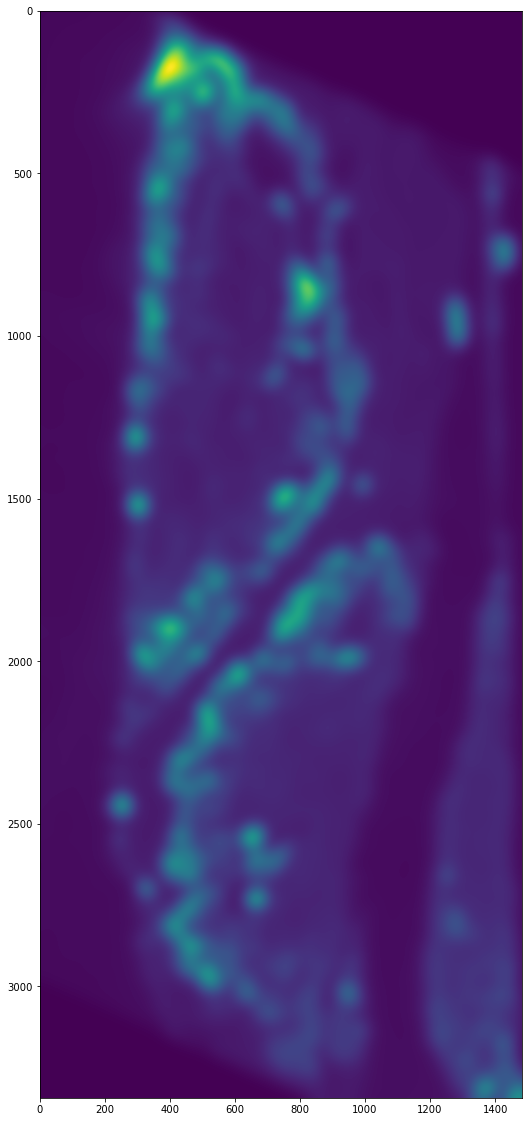

In [20]:
plt.figure(figsize=(10, 20))
plt.imshow(filters.gaussian(img, sigma=25))

In [43]:
def remove_background(img):
    filtered_image = img / filters.gaussian(img, sigma=25)
    filtered_image = filtered_image - np.nanmedian(filtered_image)
    filtered_image = np.nan_to_num(filtered_image)
    return filtered_image

In [47]:
filtered_raw = np.array([remove_background(img) for img in raw])

/tmp/ipykernel_133074/2229207567.py:2: RuntimeWarning: invalid value encountered in true_divide
  filtered_image = img / filters.gaussian(img, sigma=25)


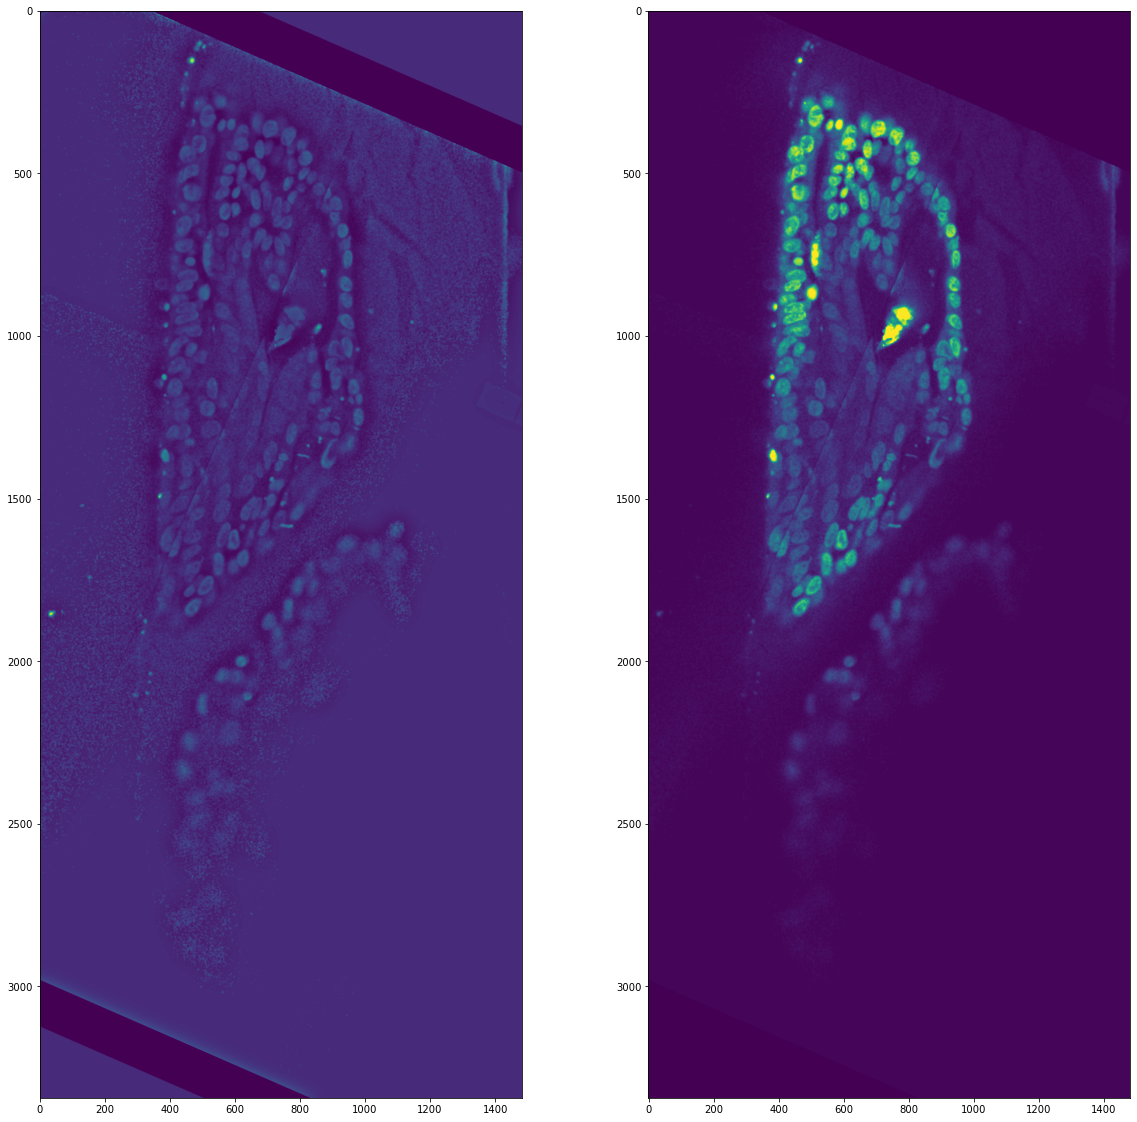

In [51]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 20))

ax1.imshow(filtered_raw[0, :, :])
ax2.imshow(raw[0, :, :])

In [30]:
plt.figure(figsize=(10, 20))
plt.imshow(filters.median(img, footprint=np.ones((100, 100))))

KeyboardInterrupt: 

<Figure size 720x1440 with 0 Axes>

/tmp/ipykernel_133074/3435863268.py:2: RuntimeWarning: invalid value encountered in true_divide
  filtered_image = img / filters.gaussian(img, sigma=25)


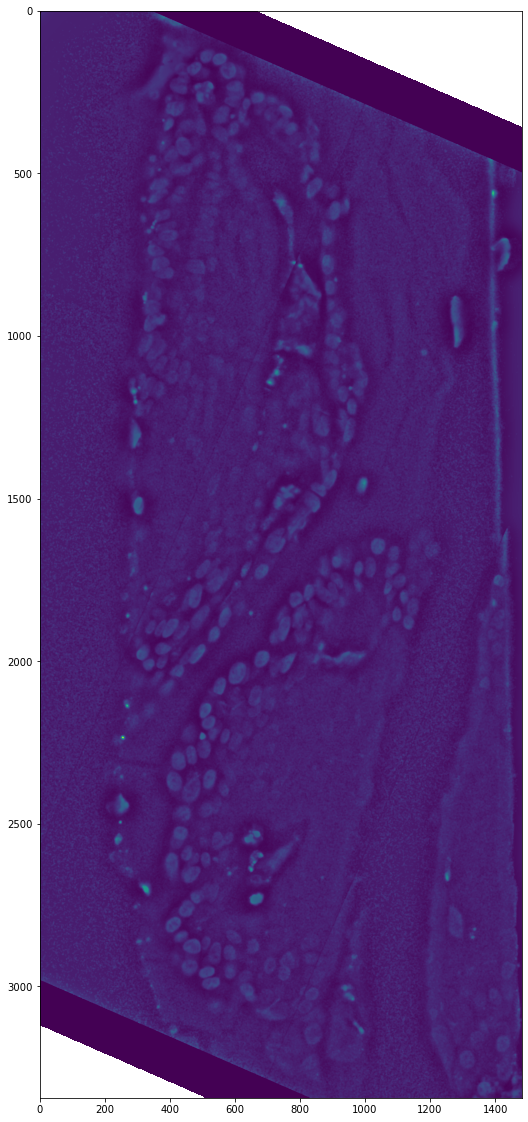

In [42]:
plt.figure(figsize=(10, 20))
filtered_image = img / filters.gaussian(img, sigma=25)
filtered_image = filtered_image - np.nanmedian(filtered_image)
plt.imshow(filtered_image)

In [35]:
np.nanmax(filtered_image)

2598.8372958374684

In [36]:
np.nanmin(filtered_image)

-230.39547762126676

In [37]:
np.max(img)

255

In [38]:
np.min(img)

0

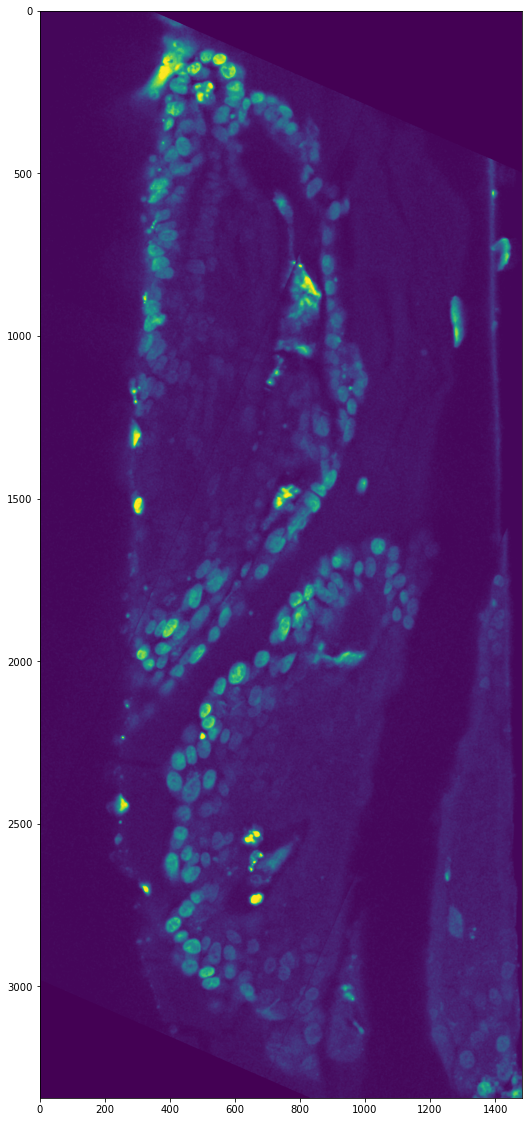

In [22]:
plt.figure(figsize=(10, 20))
plt.imshow(img - filters.gaussian(img, sigma=25))

In [8]:
roi = np.s_[:]
segm = read_volume(f_out, "cellpose", roi)
segm_background = read_volume(f_out, "cellpose_background", roi)

Reading roi slice(None, None, None) of volume cellpose from /scratch/buglakova/data/cryofib/segm_fluo/cellpose/cellpose_2D.n5
Read volume with shape (55, 3343, 1482), data type uint16
Reading roi slice(None, None, None) of volume cellpose_background from /scratch/buglakova/data/cryofib/segm_fluo/cellpose/cellpose_2D.n5
Read volume with shape (55, 3343, 1482), data type uint16


## Open it in napari

In [9]:
v = napari.Viewer()

In [10]:
v.add_image(raw)

<Image layer 'raw' at 0x7f7b307876a0>

In [11]:
raw.shape

(55, 3343, 1482)

In [17]:
v.add_image(boundaries)

<Image layer 'boundaries' at 0x7fd99826c3d0>

In [19]:
v.add_image(extra)

<Image layer 'extra' at 0x7fd9983b3b50>

In [12]:
v.add_labels(segm)

<Labels layer 'segm' at 0x7f7b3062b4f0>

In [13]:
v.add_labels(segm_background)

<Labels layer 'segm_background' at 0x7f7ab40e7be0>

In [21]:
v.add_labels(binary_boundaries)

<Labels layer 'binary_boundaries' at 0x7fd99816af40>

In [14]:
for beta, name in zip(betas, beta_names):
    v.add_labels(multicut[beta], name=name)

In [22]:
raw.shape

(1350, 1506, 1647)